# Directed Erdos-Renyi random graph
This example concerns running our link community algorithm in a directed Erdos-Renyi random graph. First, let's start by adding the right libraries.

In [1]:
T = True
F = False
# Stadard python libs ----
import numpy as np
import networkx as nx
# Personal libs ----
from networks.toy import TOY
from modules.main import ELK
from modules.colregion import colregion
from plotting_jupyter.plotting_H import Plot_H
from various.network_tools import get_labels_from_Z, get_best_kr_equivalence

Now, let's add some variables that are important for the algorithm.

- linkage: The linkage method is applied to the link community algorithm.

- lookup: Denote the value of the network's edge weights associated with no-links.

- cut: Compute the quality functions in the link community process using all the steps (**False**) or only the steps which different link community dendrogram heights (**True**).

- mode: Associated with the self-loop weight in the feature vectors. Currently, the **ZERO** mode, i.e., no self-loop, the **ALPHA** mode, the average of the feature vector, and the **BETA** mode, the average using the opposite direction, are supported. The **ZERO** mode is the traditional one.

- topology: There are three topologies: **SOURCE**, **TARGET**, and **MIX**. This variable determines the direction of the similarities between the nodes

- opt_score: Quality functions to find the best partition. Currently, there are three: $D$ (average link density), **$\chi$** (susceptibility), and the loop entropy **$H_{L}$**.


In [2]:
linkage = "single"
lookup = F
cut = T
mode = "ZERO"
topology = "MIX"
index = "H2"

properties = {
  "version" : "ER",
  "lookup" : lookup,
  "cut" : cut,
  "topology" : topology,
  "index" : index
}

Create a directed Erdos-Renyi random graph and pass it to the TOY class.

In [3]:
rho = 0.6                                                   # Network density
N = 50                                                     # Number of nodes
M = int(N * (N - 1) * rho)                                 # Number of edges
G = nx.gnm_random_graph(N, M, seed=12345, directed=T)       # Create random graph using networkx
A = nx.adjacency_matrix(G).todense()                        # Convert it to adjacency matrix
A = np.array(A, dtype=float)                                # Convert it to a numpy object
labels = np.arange(N).astype(int).astype(str)               # Create the nodes' labels
                                                            #     and save them in dictionary
labels_dict = dict()
for i in np.arange(N):
  labels_dict[i] = labels[i]
# Create TOY ---
NET = TOY(A, **properties)
NET.set_labels(labels)

Finally, run the Hierarchy class which runs the link community analysis.
PD: if you see RuntimeWarnigs, they come from the similarities computed using the jacp feature. The warning is not important.

In [4]:
H = ELK(A, N, linkage, mode, **properties)
## Compute quality functions ----
H.compute_H_features_cpp()
## Compute link entropy ----
H.link_entropy_cpp("short", cut=cut)
## Compute node communty dendrogram ----
H.la_abre_a_merde_cpp()
## Compute node entropy ----
H.node_entropy_cpp("short", cut=cut)
# Set labels to network ----
L = colregion(NET)
L.get_regions()
H.set_colregion(L)
H.set_entropy([
  H.node_entropy, H.node_entropy_H,
  H.link_entropy, H.link_entropy_H
])

Compute link hierarchical agglomeration ----
	> Compute features
Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 2939

	link entropy :  Sh : 0.2237, and Sv : 0.7763


	link entropy H: Sh : 0.2192, and Sv : 0.7808

	> Compute the node hierarchy ----
Commencer: la abre a merde
Voila, bon ami

	Node entropy :  Sh : 0.0465, and Sv : 0.9535


	Node entropy H: Sh : 0.0407, and Sv : 0.9593

Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 99


Let's see the performance of the $\mu$-score, $\chi$, $D$, and the order parameter ($m$) variables during the link community agglomeration process.

Node hierarchy entropy

	> Visualize Hierarchical Entropy by levels!!!
Levels node hierarchy: 42
Levels link hierarchy: 231
            S dir                 c  level
87   0.005756   H  node_hierarchy_H     39
146  0.061152   V  node_hierarchy_H     22
1    0.005817   H    node_hierarchy     41
42   0.034529   V    node_hierarchy     42
652  0.010637   H  link_hierarchy_H    209
883  0.036120   V  link_hierarchy_H    209
318  0.003021   H    link_hierarchy     81
548  0.006505   V    link_hierarchy     82
	> Plot loop entropy as a function of K
Plot X as a function of K
	> Plot D as a function of K


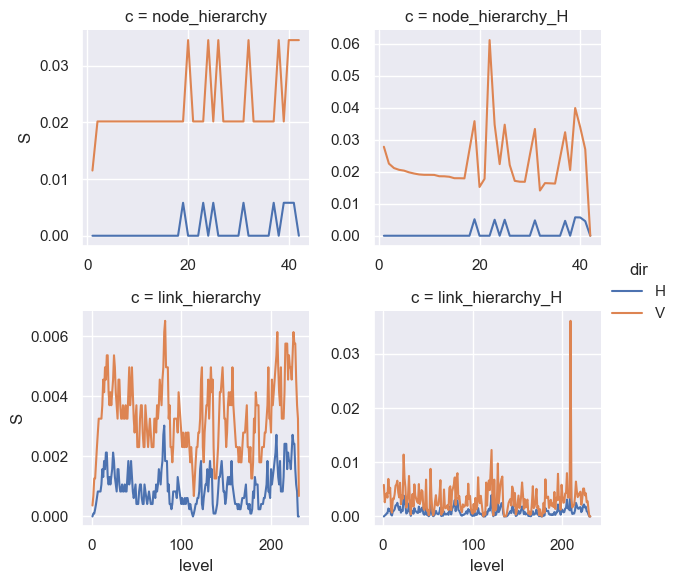

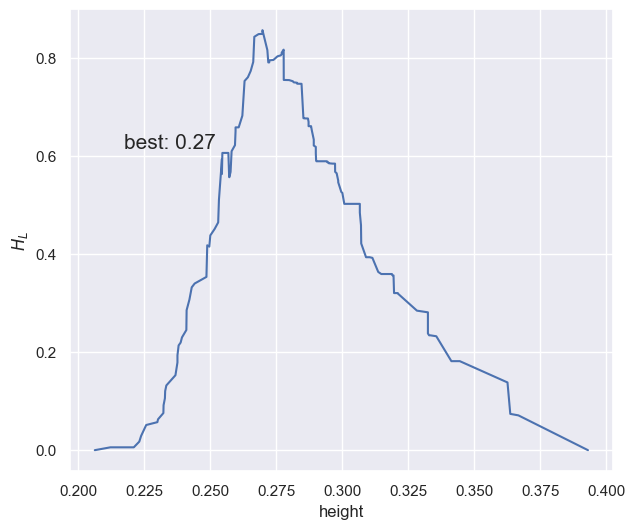

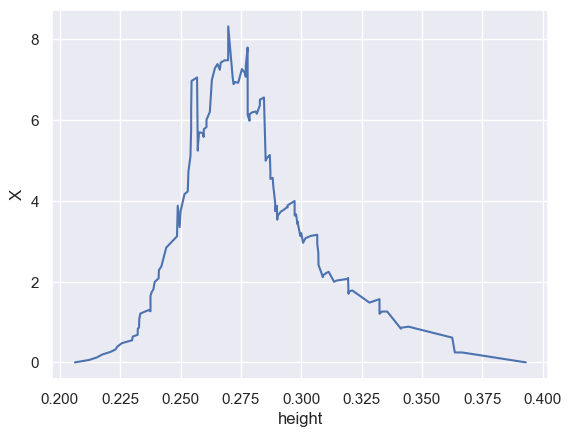

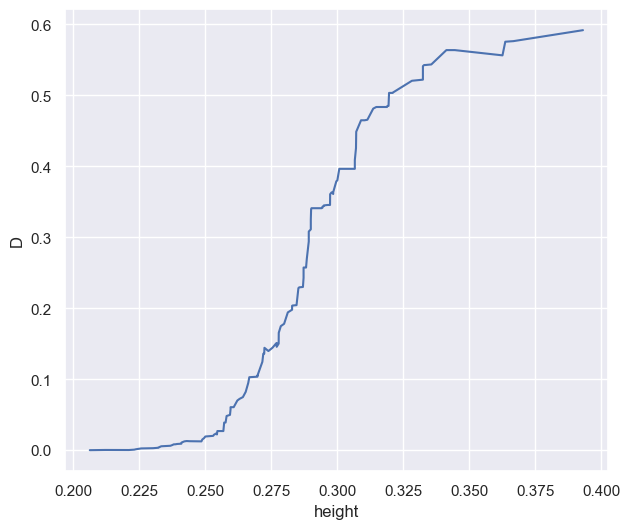

In [5]:
# Plot H ----
plot_h = Plot_H(H)
plot_h.plot_Hierarchical_Entropy(width=7, height=6)
plot_h.plotHL(width=7, height=6)
plot_h.plotX(width=7, height=6)
plot_h.plotD(width=7, height=6)

Let's look at the partitions using the different quality functions. Note that in the matrix link community representation, the order of the matrix comes from the node dendrogram and carmine links represent tree-like, zero-link density, link communities.
- $H_{L}$ partition.

Visualize nodal dendrogram!!!


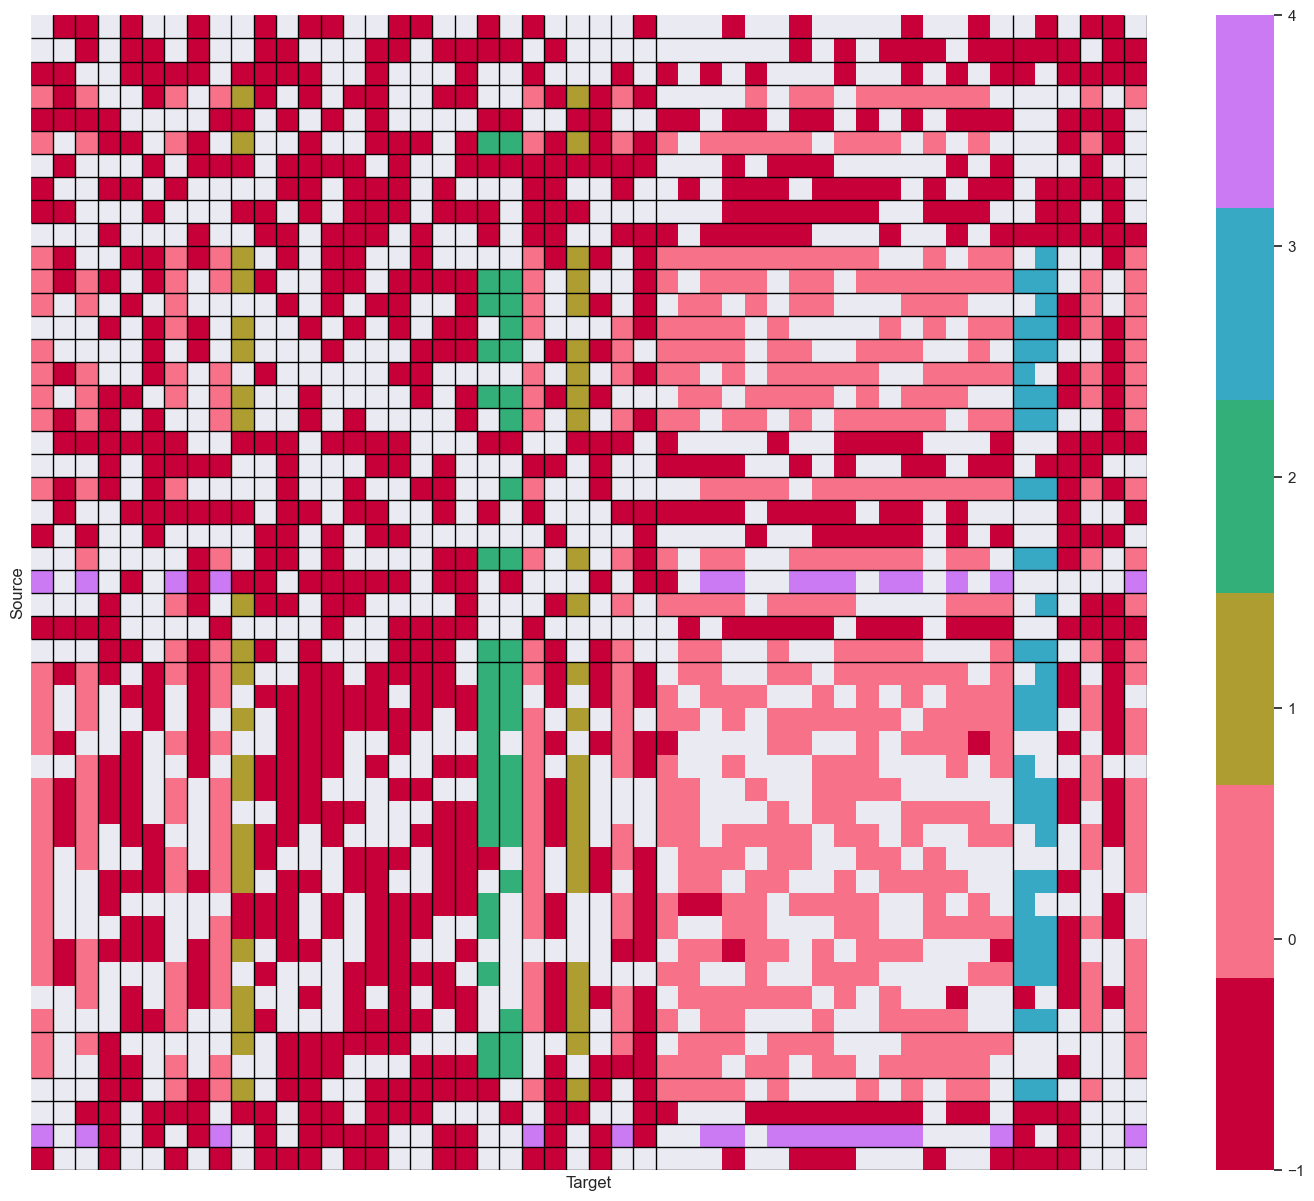

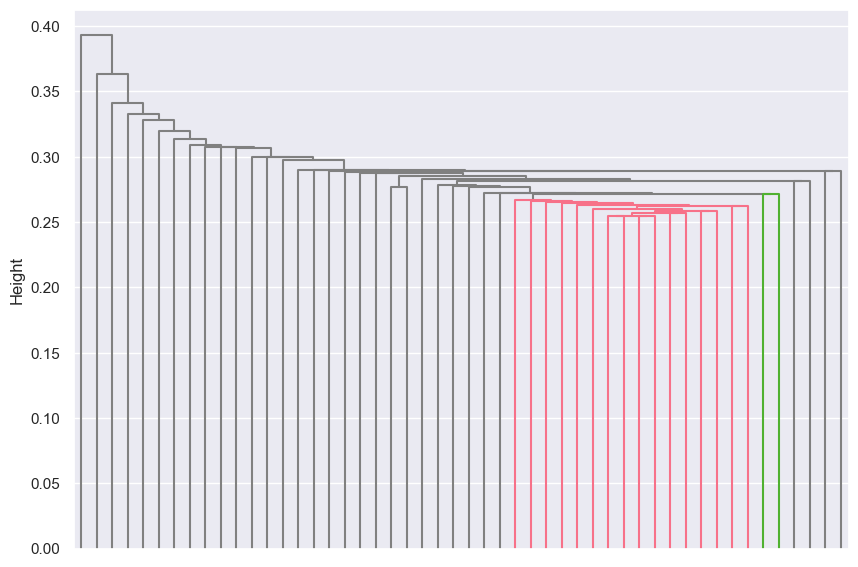

In [6]:
score = "_HL"
k, r = get_best_kr_equivalence(score, H)
plot_h.lcmap_dendro(r, k, cmap_name="husl", remove_labels=True)
plot_h.nodal_dendrogram(r, cmap_name="husl", remove_labels=True)

- $\chi$

Visualize nodal dendrogram!!!


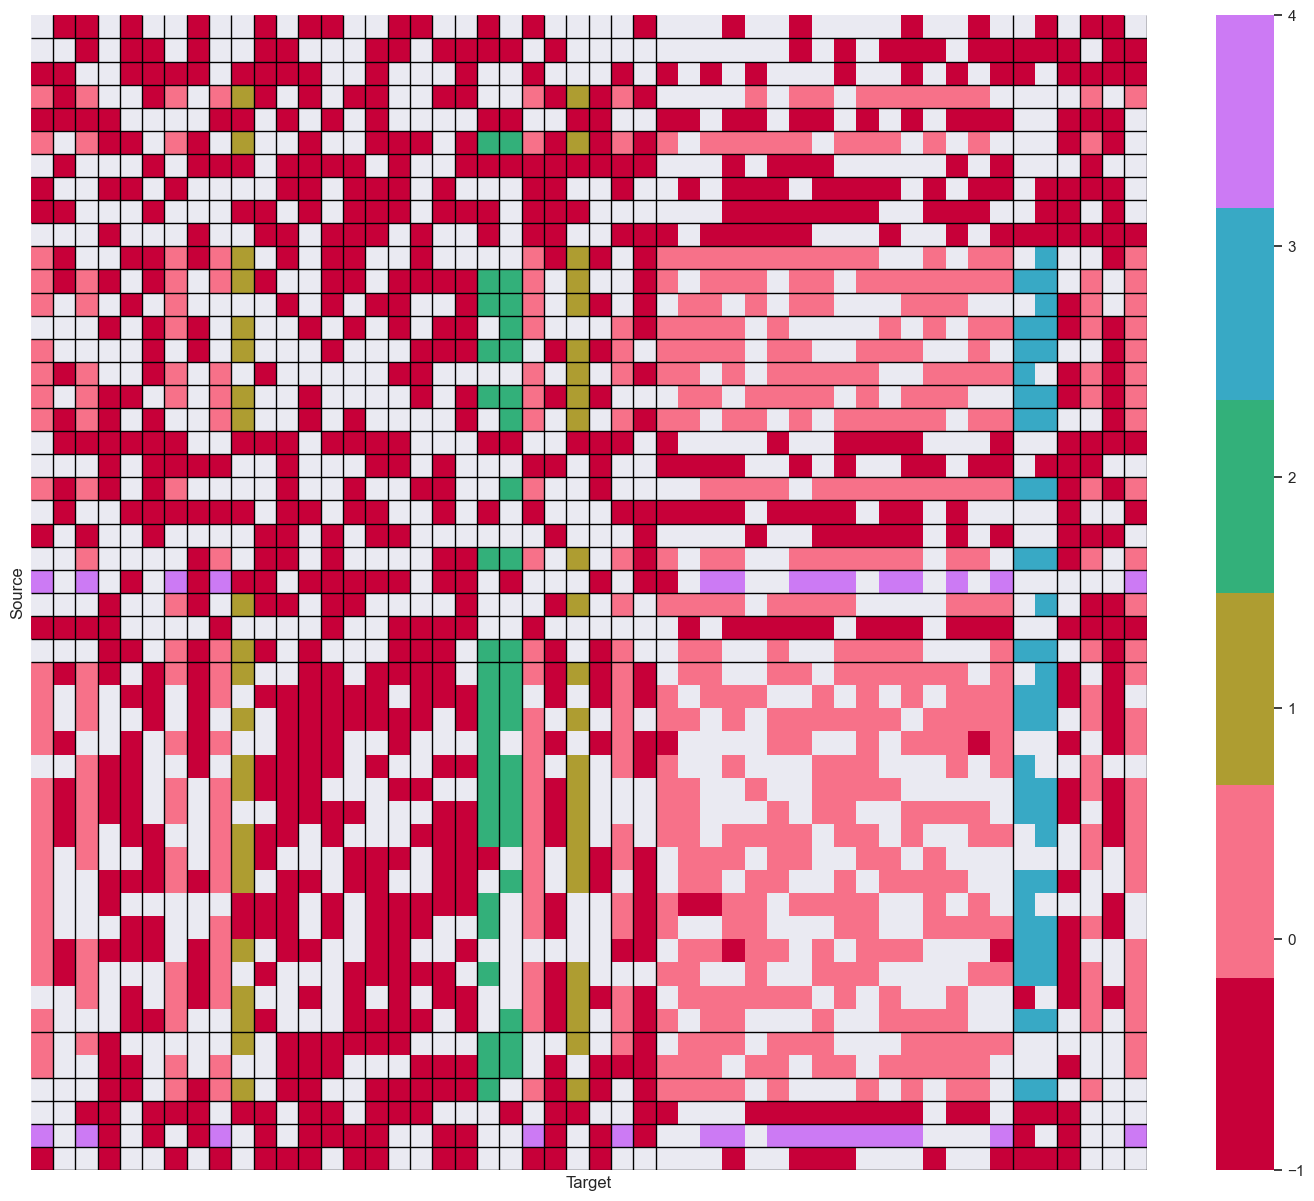

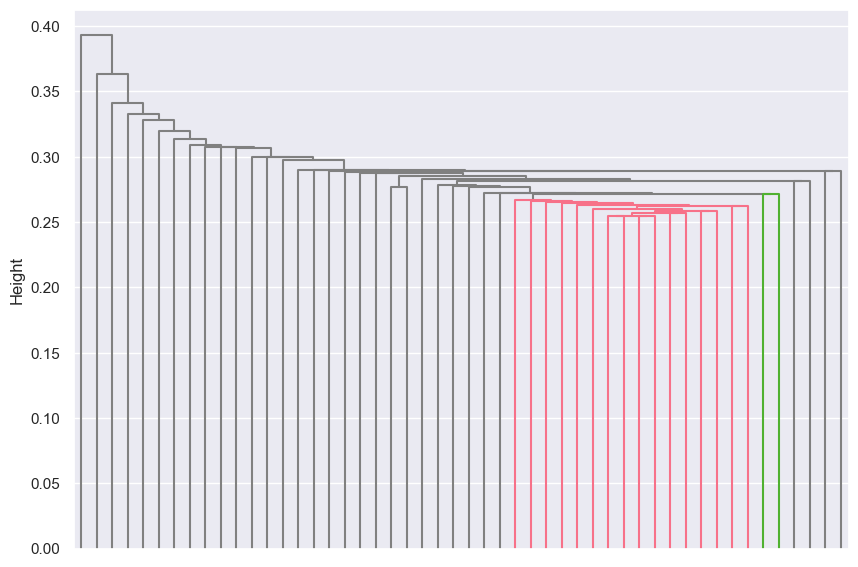

In [7]:
score = "_X"
k, r = get_best_kr_equivalence(score, H)
plot_h.lcmap_dendro(r, k, cmap_name="husl", remove_labels=True)
plot_h.nodal_dendrogram(r, cmap_name="husl", remove_labels=True)

- $D$ (average link community density, the original quality function)

Visualize nodal dendrogram!!!


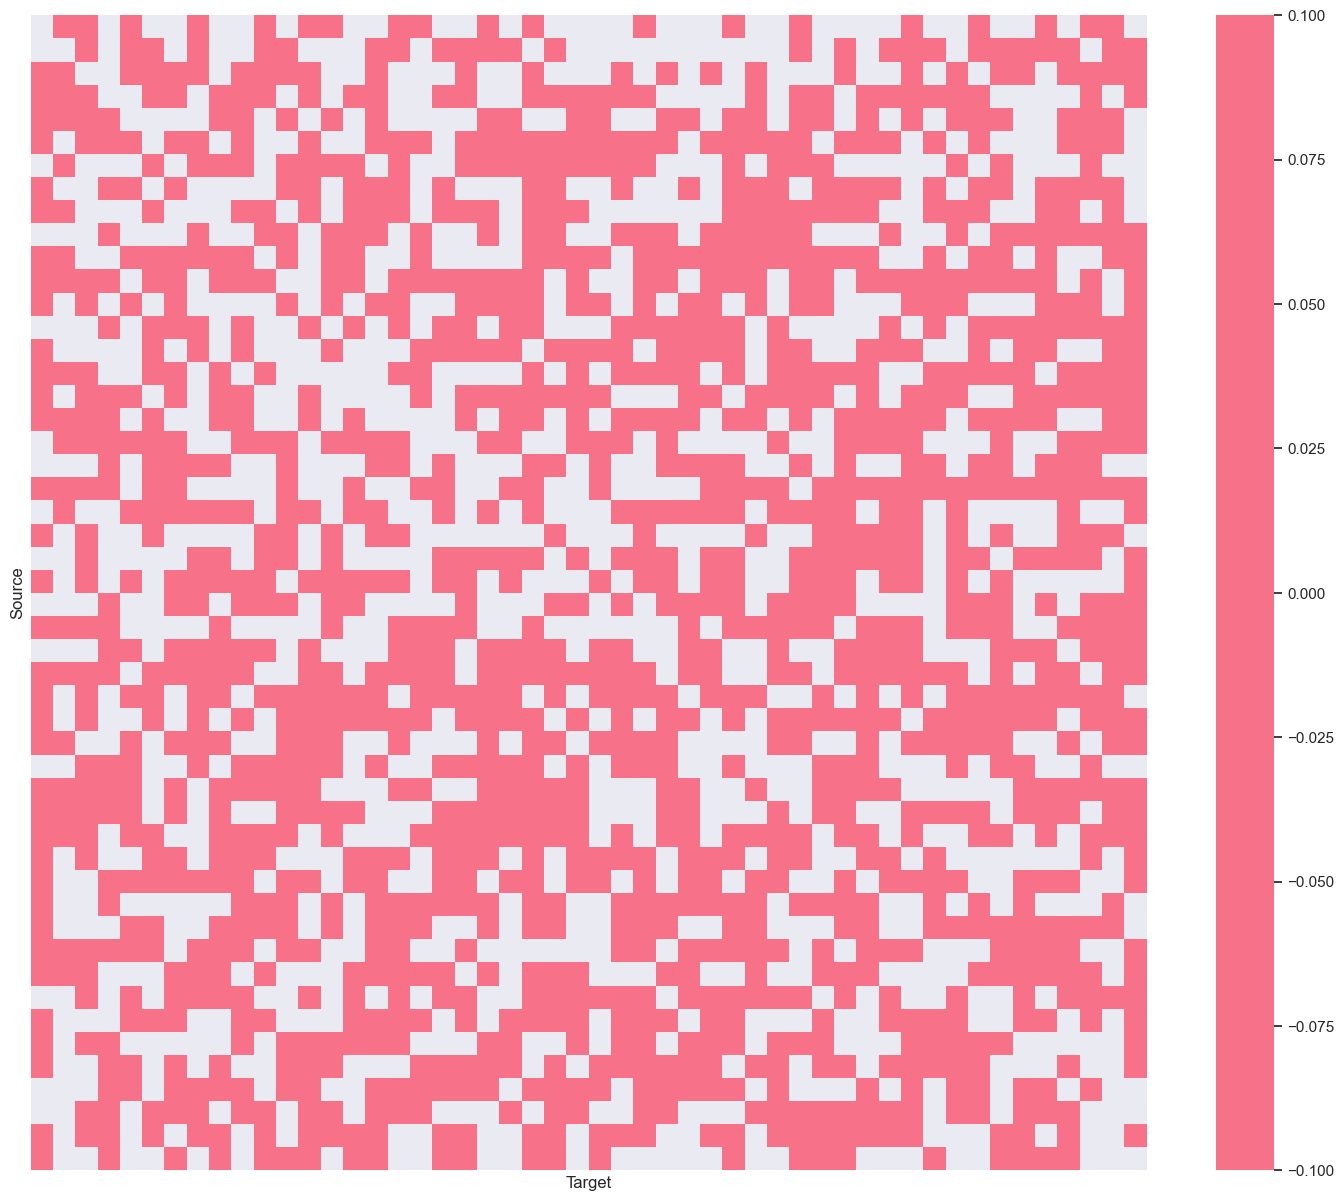

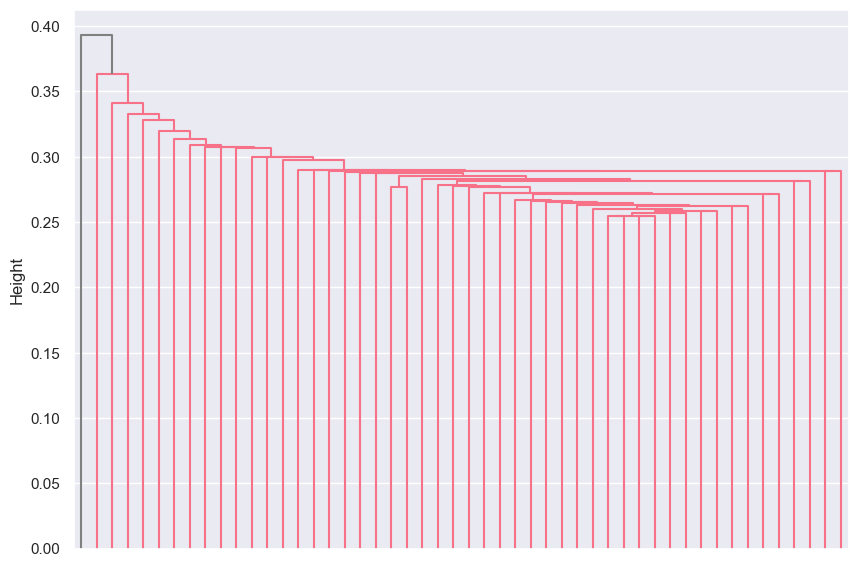

In [8]:
score = "_D"
k, r = get_best_kr_equivalence(score, H)
plot_h.lcmap_dendro(r, k, cmap_name="husl", remove_labels=True)
plot_h.nodal_dendrogram(r, cmap_name="husl", remove_labels=True)

## Conclusions

1. As can be noted, the node hierarchy shows the minimal structure as expected for a Erdos-Renyi network.
2. The link community density fails because the network is dense ($\rho=0.6$). The graph varies very smoothly which means that link communities were appearing and disappearing constantly. This fast behavior is associated with a lack of structure.